In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def ReadPGM(name):
    with open(name) as f:
        lines = f.readlines()

    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    assert lines[0].strip() == 'P2'

    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

def read_pixels(img_path):
    pixels, shape, scale = ReadPGM(img_path)
    return pixels.reshape(shape)

In [3]:
def ShowPGM(img_path):
    image = ReadPGM(img_path)
    # plot the initial image
    plt.imshow(np.reshape(image[0], image[1]), cmap="Greys_r")
    plt.title("Image %s"%img_path)
    plt.show()

def Draw_hist(img_path):
    image = ReadPGM(img_path)
    # plot the histogram of image 
    pixels = image[0]
    plt.hist(pixels, bins=image[2])
    plt.title("Histogram of pixels of %s"%img_path)
    plt.show()
    
def show_image(*img_matrix,cmap='gray'):
    for i in img_matrix:
        plt.imshow(i, cmap=cmap)
        plt.show()
        
def show_hist(img_matrix):
    temp = img_matrix.reshape(-1)
    plt.hist(temp, bins=255)
    plt.show()

In [4]:
def hist_stretch(pixels):
    temp_matrix = pixels.copy().reshape(-1)
    max_val, min_val = max(temp_matrix), min(temp_matrix)
    interval = max_val-min_val
    for index, val in enumerate(temp_matrix):
        temp_matrix[index] = 255 * (val-min_val) / interval
        
    plt.hist(temp_matrix, bins=255)
    plt.title("Histogram of pixels")
    plt.show()
    
    return temp_matrix.reshape(pixels.shape)

In [5]:
def power_law(pixels, c, gamma):
    temp_matrix = pixels.reshape(-1).copy()
    for index, i in enumerate(temp_matrix):
        temp_matrix[index] = int(c*(i**gamma))
        
    return temp_matrix.reshape(pixels.shape)

In [6]:
def GaussianMaskGenerator(size=(3,3), sigma=1):
    if isinstance(size, tuple):
        x, y = size
        mx, my = x//2, y//2
        matrix = []
        for i in range(mx-x+1, x-mx):
            line = []
            for j in range(my-y+1, y-my):
                line.append(round(math.e**(-(i**2+j**2)/(2*sigma**2)),2))
            matrix.append(line)

        matrix = np.array(matrix)
    else:
        print('Please input tuple for the size parameter.')
        return 
    
    return matrix

In [7]:
def averaging_mask(image, mask: np.ndarray=np.full((3,3),1)):
    if not (isinstance(mask, np.ndarray)):
        print('Please input np.ndarray type as mask and tuple as centroid')
    
    
    rows, cols = image.shape
    mask_rows, mask_cols = mask.shape
    
    #if centroid == ():
    centroid = (int(mask_rows/2), int(mask_cols/2))
    
    handle_matrix = image.copy()
    
    
    for row in range(centroid[0], rows - (mask_rows-centroid[0]) + 1):
        for col in range(centroid[1], cols - (mask_cols-centroid[1]) + 1):
            handle_matrix[row][col] = (image[row-centroid[0]:row-centroid[0]+mask_rows,col-centroid[1]:col-centroid[1]+mask_cols] * mask).sum()/mask.sum()
                        
    return handle_matrix

def median_mask(image, mask: np.ndarray=np.full((3,3),1)):
    if not (isinstance(mask, np.ndarray)):
        print('Please input np.ndarray type as mask and tuple as centroid')
        return None
        
    
    rows, cols = image.shape
    mask_rows, mask_cols = mask.shape

    centroid = (int(mask_rows/2), int(mask_cols/2))
    
    handle_matrix = image.copy()
    for row in range(centroid[0], rows - (mask_rows-centroid[0]) + 1):
        for col in range(centroid[1], cols - (mask_cols-centroid[1]) + 1):
            handle_matrix[row][col] = np.median(image[row-centroid[0]:row-centroid[0]+mask_rows,col-centroid[1]:col-centroid[1]+mask_cols])
                        
    return handle_matrix
    

In [8]:
def edge_detector(image, filter='Prewitt'):
    rows, cols = image.shape
        
    mask_dict = {
        'PrewittX': np.array([[-1,0,1],[-1,0,1],[-1,0,1]]),
        'PrewittY': np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
        'Prewitt': np.array([[-2,-1,0],[-1,0,1],[0,1,2]]),
        'SobelX': np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),
        'SobelY': np.array([[-1,-2,-1],[0,0,0],[1,2,1]]),
        'SobelO': np.array([[-2,-1,0],[-2,1,2],[0,3,2]]),
        'Sobel': np.array([[-2,-2,0],[-2,0,2],[0,2,2]]),
    }
    if not filter in mask_dict.keys():
        print(r'The filter you can select from below list: {PrewittX,PrewittY,Prewitt,SobelX,SobelY,Sobel}')
        return 
    mask = mask_dict[filter]
    
    mask_rows, mask_cols = mask.shape
    centroid = (int(mask_rows/2), int(mask_cols/2))
    handle_matrix = image.copy()
    
    for row in range(centroid[0], rows - (mask_rows-centroid[0])+1):
        for col in range(centroid[1], cols - (mask_cols-centroid[1])+1):
            handle_matrix[row][col] = (image[row-centroid[0]:row-centroid[0]+mask_rows,col-centroid[1]:col-centroid[1]+mask_cols] * mask).sum()
    
    return handle_matrix

In [9]:
def thresholding_filter(image, thresholding):
    temp = image.copy()
    temp[temp>thresholding]=255
    temp[temp<=thresholding]=0
    return temp

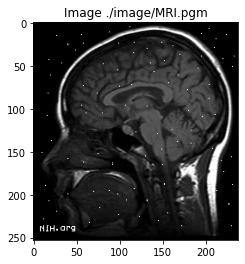

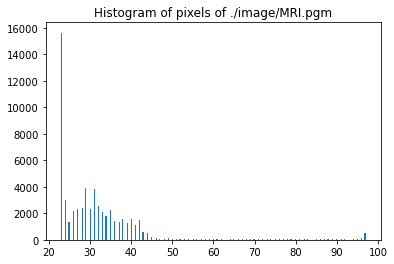

In [10]:
ShowPGM('./image/MRI.pgm')
Draw_hist('./image/MRI.pgm')

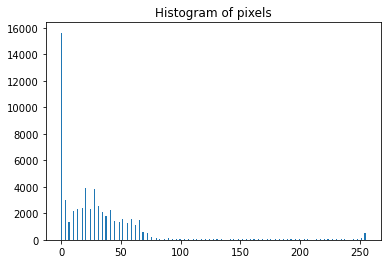

In [11]:
image1 = read_pixels('./image/MRI.pgm')
image1 = hist_stretch(image1)

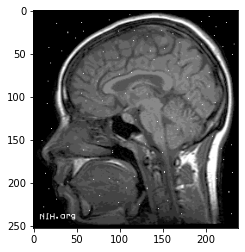

In [17]:
image2 = power_law(image1, 1, 0.5)
show_image(image2,cmap='gray')

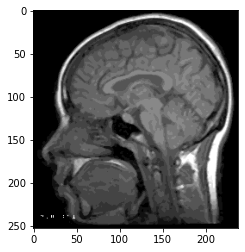

In [18]:
image4 = median_mask(image2, np.full((3,3),1))
show_image(image4,cmap='gray')

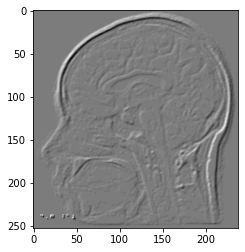

In [20]:
image6 = edge_detector(image4,'Sobel')
show_image(image6,cmap='gray')

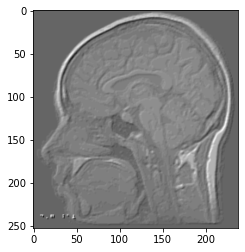

In [21]:
image7 = edge_detector(image4,'SobelO')
show_image(image7,cmap='gray')

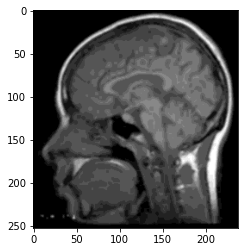

In [19]:
image5 = averaging_mask(image4,GaussianMaskGenerator((3,3),1))
show_image(image5,cmap='gray')

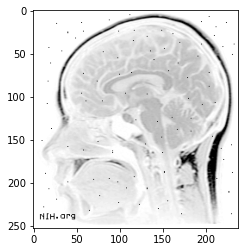

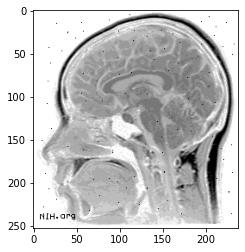

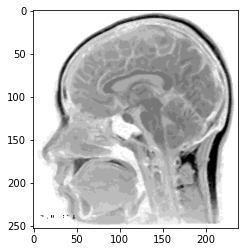

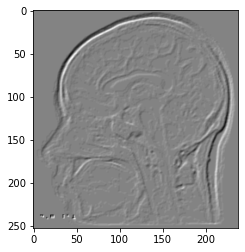

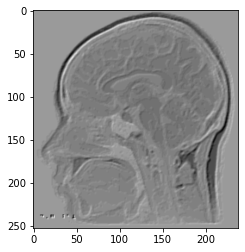

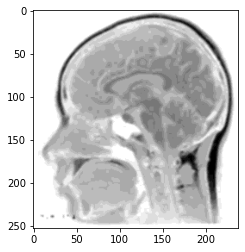

In [22]:
show_image(image1, image2, image4, image6, image7, image5, cmap='binary')